# Mexico City Neighborhoods score 


On this Notebook we want to see the disdtribution of the Airbnb scores by neighborhoods in Mexico City

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
airbnb_df = pd.read_csv(r"https://raw.githubusercontent.com/prope-2020-gh-classroom/practica-final-por-equipos-verano-2020-itam-EddOselotl/master/airbnb_clean.csv")

In [56]:
# we might want to know what the names of the columns are
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_since', 'host_total_listings_count',
       'latitude', 'longitude', 'neighbourhood_cleansed', 'property_type',
       'room_type', 'square_feet', 'price', 'review_scores_rating', 'z_score'],
      dtype='object')

First we want to know what neighborhoods we have on our dataset

In [57]:
print("\nIn Mexico City, the following neighborhoods have Airbnb rooms:\n")
for neighborhood in airbnb_df.neighbourhood_cleansed.unique():
    print("- {}".format(neighborhood))


In Mexico City, the following neighborhoods have Airbnb rooms:

- Cuauhtémoc
- Cuajimalpa de Morelos
- Coyoacán
- Miguel Hidalgo
- Benito Juárez
- Azcapotzalco
- Iztacalco
- Tlalpan
- La Magdalena Contreras
- Venustiano Carranza
- Álvaro Obregón
- Gustavo A. Madero
- Iztapalapa
- Xochimilco
- Tláhuac
- Milpa Alta


Let's see how many Airbnb rooms we have per neighborhood

In [58]:
airbnb_df.neighbourhood_cleansed.value_counts()

Cuauhtémoc                8411
Benito Juárez             3436
Miguel Hidalgo            3416
Coyoacán                  1858
Álvaro Obregón            1021
Tlalpan                    902
Cuajimalpa de Morelos      463
Venustiano Carranza        447
Gustavo A. Madero          364
Iztacalco                  335
Iztapalapa                 306
Azcapotzalco               258
La Magdalena Contreras     160
Xochimilco                 137
Tláhuac                     40
Milpa Alta                  18
Name: neighbourhood_cleansed, dtype: int64

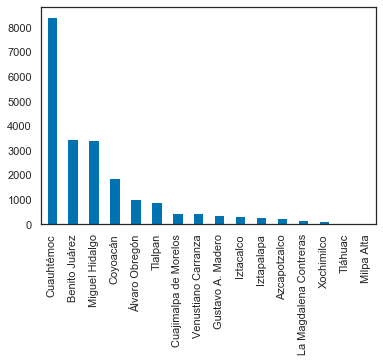

In [59]:
airbnb_df.neighbourhood_cleansed.value_counts().plot.bar()
plt.show()

As we can see, the neighborhood with more Airbnb rooms is **Cuauhtémoc**

We want to know the score mean per neighborhood.

In [60]:
mean_neighborhoods = airbnb_df.groupby(["neighbourhood_cleansed"])["review_scores_rating"].mean()
print(mean_neighborhoods.to_string())

neighbourhood_cleansed
Azcapotzalco              94.761589
Benito Juárez             95.282081
Coyoacán                  95.419331
Cuajimalpa de Morelos     95.798742
Cuauhtémoc                95.034968
Gustavo A. Madero         94.146789
Iztacalco                 94.248031
Iztapalapa                93.700000
La Magdalena Contreras    93.927273
Miguel Hidalgo            95.197657
Milpa Alta                74.000000
Tlalpan                   94.266667
Tláhuac                   95.894737
Venustiano Carranza       94.738292
Xochimilco                92.695652
Álvaro Obregón            95.422254


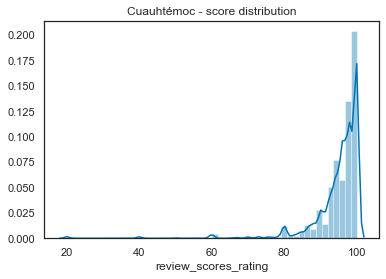

In [61]:
Cuau_df = airbnb_df[airbnb_df.neighbourhood_cleansed == "Cuauhtémoc"]["review_scores_rating"]
Cuau_nan = Cuau_df[~np.isnan(Cuau_df)]
sns.distplot(Cuau_nan)
plt.title("Cuauhtémoc - score distribution")
plt.show()

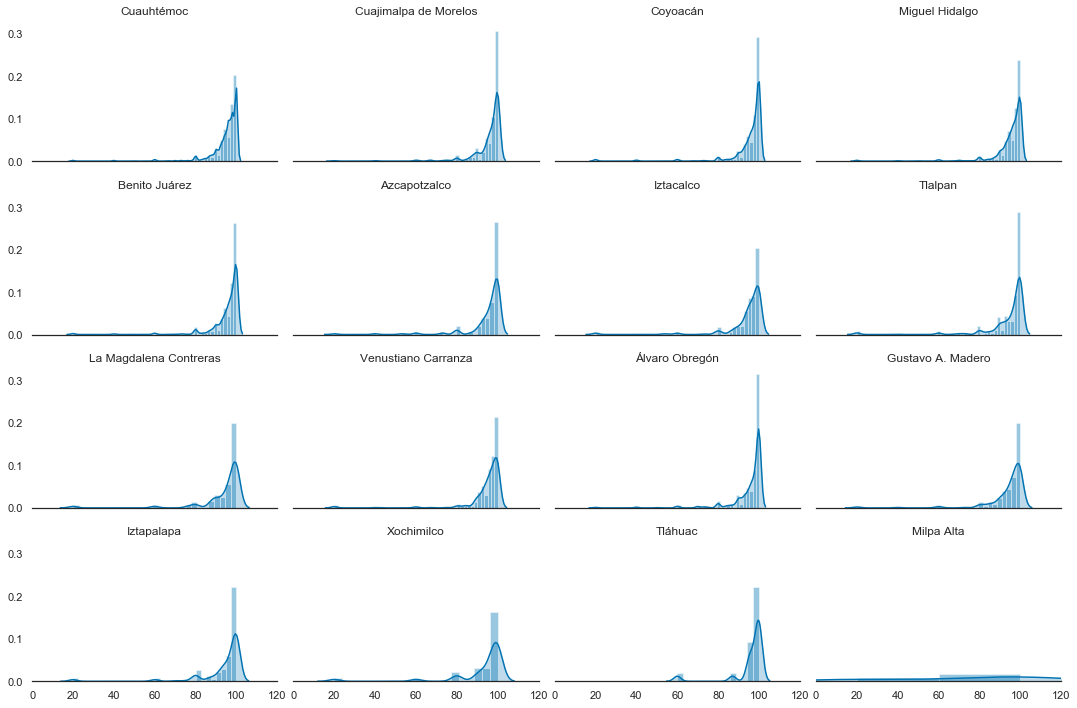

In [62]:
# Plot for the rest of the beighborhoods
sns.set(style="white", palette="colorblind", color_codes=False)

fig, axs = plt.subplots(4, 4, sharex=True, sharey=True,figsize=(15, 10))

for axs,neighborhood in zip(axs.ravel(),airbnb_df.neighbourhood_cleansed.unique()):
    # Get the new df frame, only neighborhood with review scores
    df = airbnb_df[airbnb_df.neighbourhood_cleansed == neighborhood]["review_scores_rating"]
    nan = df[~np.isnan(df)] # Remove de NaNs
    sns.distplot(nan, ax=axs, kde_kws={"shade": True})
    axs.set_title(neighborhood)
    axs.set(xlabel="",xlim=(0,120))
    
plt.tight_layout()
sns.despine(left=True)

Seems the worst neighborhood rated is **Milpa Alta**, but we can't jump into that conclusion since the scores weren't balanced.

In [64]:
# mean_neighborhoods is a Serie..

# Get the neighborhood with max score
best_neighborhood = mean_neighborhoods.idxmax() 
max_score = round(max(mean_neighborhoods),2)

print("\n{} is the best rated neighborhood with {} out of 100 points.\n".format(best_neighborhood,max_score))


Tláhuac is the best rated neighborhood with 95.89 out of 100 points.



In [65]:


# Get the neighborhood with min score
worst_neighborhood = mean_neighborhoods.idxmin() 
min_score = round(min(mean_neighborhoods),2)

print("\n{} is the worst rated neighborhood with {} out of 100 points.\n".format(worst_neighborhood,min_score))


Milpa Alta is the worst rated neighborhood with 74.0 out of 100 points.



In [66]:
# Count how many left a review score, since we have seen there are NaN scores 
number_of_reviews = airbnb_df["review_scores_rating"].count()
reviews = round(number_of_reviews/len(airbnb_df)*100,2)

print("\n{}% of the people left a review score\n".format(reviews))


76.21% of the people left a review score



In [69]:
# Now see the distribution of the bad reviews vs good reviews by neighborhood
# Let's say <90 is a bad review

bad_review = 90

bad_df = airbnb_df[airbnb_df["review_scores_rating"] < bad_review].groupby("neighbourhood_cleansed")["review_scores_rating"].count()
#print(bad_df.to_string())

good_df = airbnb_df[airbnb_df["review_scores_rating"] >= bad_review].groupby("neighbourhood_cleansed")["review_scores_rating"].count()
#print(good_df)

df = pd.DataFrame()
df["bad_reviews"] = bad_df
df["good_reviews"] = good_df
df["bad_review_per"] =  round(bad_df / (bad_df + good_df) ,2)
df["good_review_per"] =  round(good_df / (bad_df + good_df),2)

print(df)

                        bad_reviews  good_reviews  bad_review_per  \
neighbourhood_cleansed                                              
Azcapotzalco                     15           136            0.10   
Benito Juárez                   265          2291            0.10   
Coyoacán                        115          1230            0.09   
Cuajimalpa de Morelos            34           284            0.11   
Cuauhtémoc                      745          6147            0.11   
Gustavo A. Madero                29           189            0.13   
Iztacalco                        31           223            0.12   
Iztapalapa                       26           134            0.16   
La Magdalena Contreras           17            93            0.15   
Miguel Hidalgo                  245          2401            0.09   
Milpa Alta                        3             4            0.43   
Tlalpan                          83           547            0.13   
Tláhuac                           

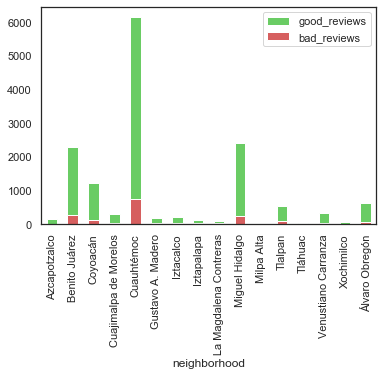

In [71]:
df["neighborhood"] = df.index
n_b = df.plot(x="neighborhood", y="good_reviews", kind="bar",color="g" )
df.plot(x="neighborhood", y="bad_reviews", kind="bar", color="r",ax=n_b )
plt.show()

As we can see this might not be the best plot to display the bad reviews vs good reviews. So now let's try with the percentage

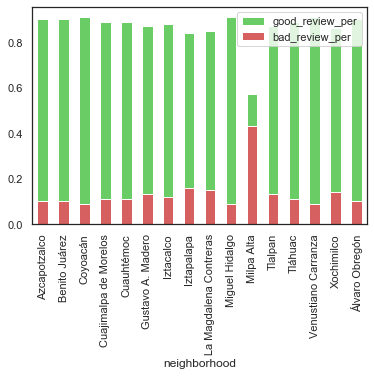

In [76]:
df["neighborhood"] = df.index
n_b = df.plot(x="neighborhood", y="good_review_per", kind="bar",color="g" )
df.plot(x="neighborhood", y="bad_review_per", kind="bar", color="r", ax=n_b )
plt.show()

In [77]:
df.good_review_per + df.bad_review_per

neighbourhood_cleansed
Azcapotzalco              1.0
Benito Juárez             1.0
Coyoacán                  1.0
Cuajimalpa de Morelos     1.0
Cuauhtémoc                1.0
Gustavo A. Madero         1.0
Iztacalco                 1.0
Iztapalapa                1.0
La Magdalena Contreras    1.0
Miguel Hidalgo            1.0
Milpa Alta                1.0
Tlalpan                   1.0
Tláhuac                   1.0
Venustiano Carranza       1.0
Xochimilco                1.0
Álvaro Obregón            1.0
dtype: float64